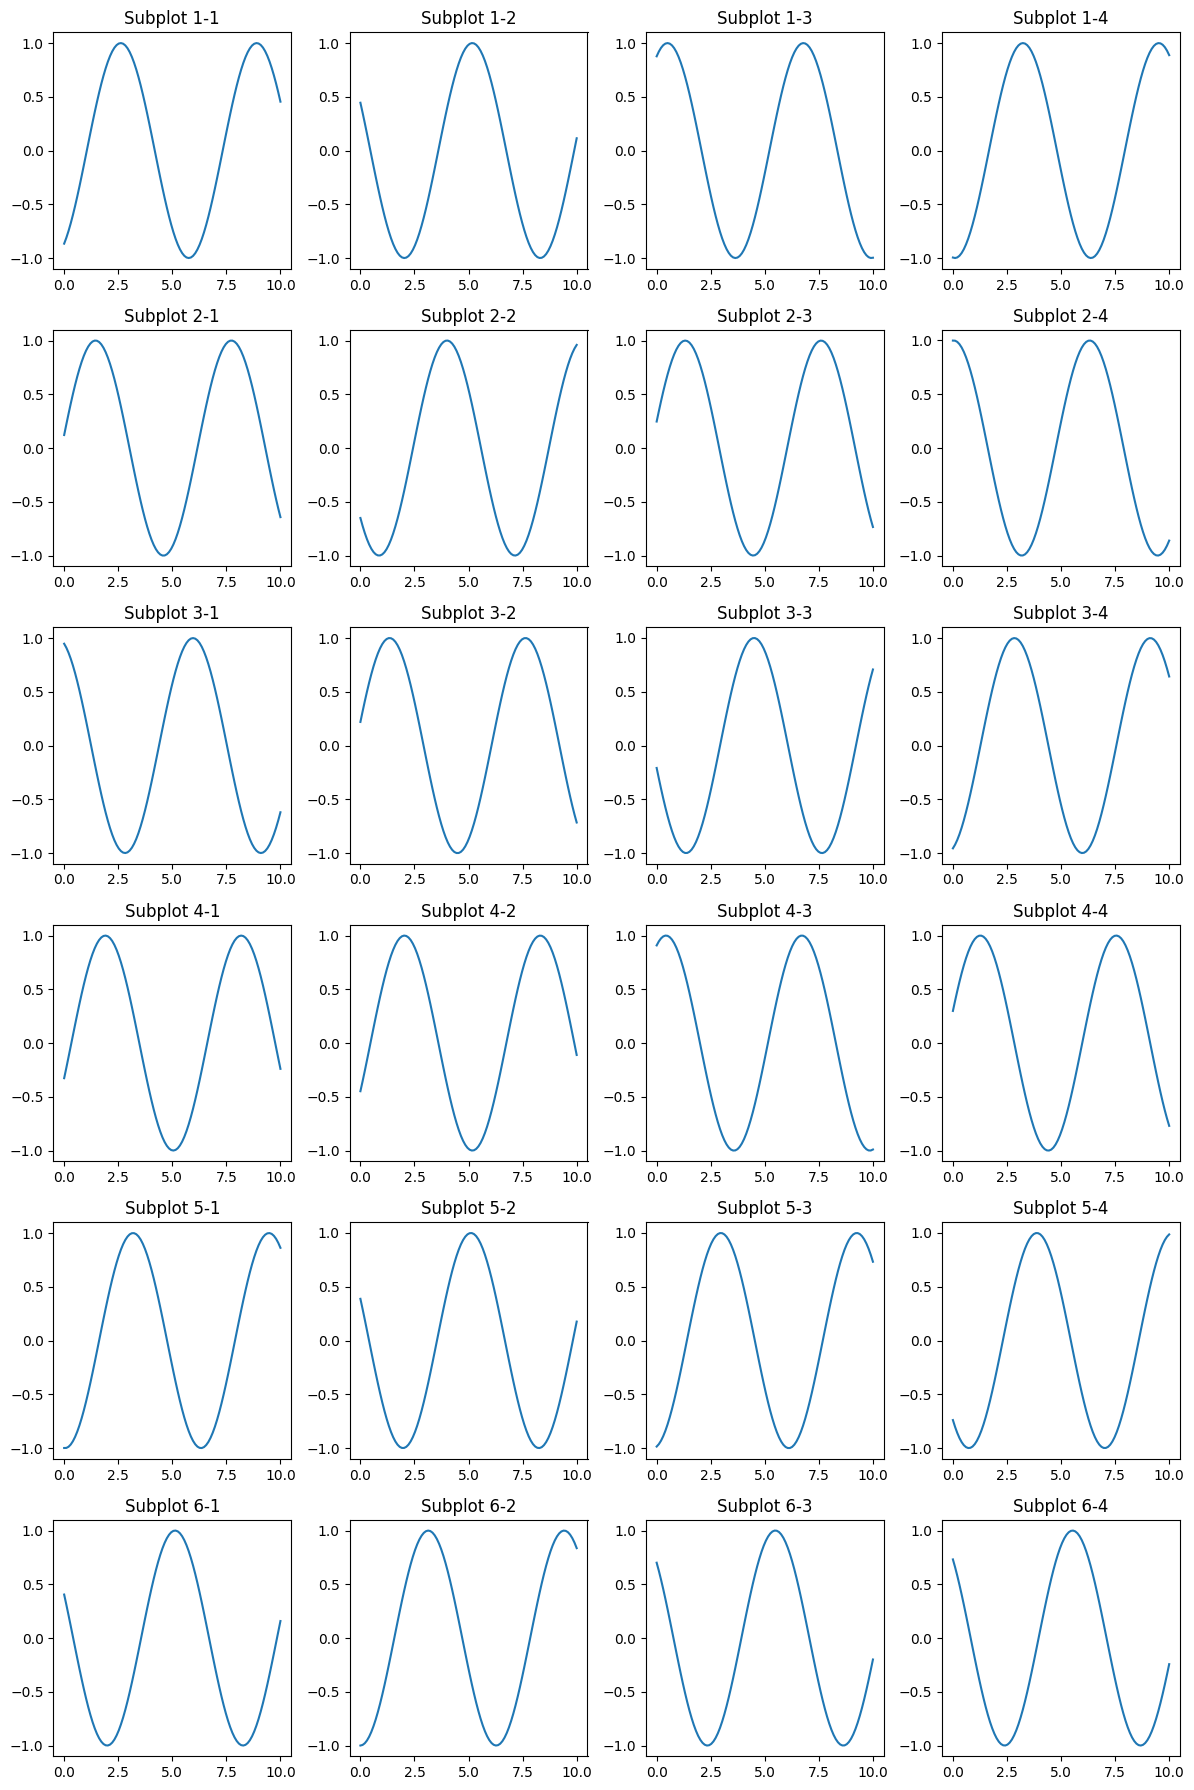

In [271]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个6x4的子图网格
fig, axs = plt.subplots(6, 4, figsize=(12, 18))

# 在每个子图中绘制随机的正弦曲线
for i in range(6):
    for j in range(4):
        x = np.linspace(0, 10, 100)
        y = np.sin(x + np.random.rand() * 2 * np.pi)  # 随机生成相位
        axs[i, j].plot(x, y)
        axs[i, j].set_title(f'Subplot {i+1}-{j+1}')

# 调整子图之间的间距和布局
plt.tight_layout()

# 显示图形
plt.show()

In [346]:
import numpy as np
import os 
import pandas as pd 
import random 
import shutil
import sys  
import matplotlib.pyplot as plt
import logging
from pprint import pprint 
from datetime import datetime

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
logging.logThreads = False
logging.logProcesses = False

chapters = ['chapter01', 'chapter02', 'chapter03']
sys.path.append(os.path.abspath(f'../code/'))

for chapter in chapters:
    base_path = os.path.abspath(f'../code/{chapter}/')
    sys.path.append(base_path)

import tic_tac_toe as c1 
import ten_armed_testbed as c2
import grid_world as c3
import chapter04 as c4
import chapter05 as c5
import seaborn as sns

# auto load the changes of referenced codes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [347]:
# if new methods are created in referenced codes, run the following code.
%reload_ext autoreload

In [404]:
import inspect


# 获取函数 my_function 的源代码并打印出来
source_code = inspect.getsource(show_best_trajectory)
print(source_code)

def show_best_trajectory(race, ncols = 3):
    nrows = int(len(race.starting_points) / ncols)
    if len(race.starting_points) % ncols != 0:
        nrows += 1 

    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 4 + 4*nrows))

    for k, start_point in enumerate(race.starting_points):
        i = k // ncols
        j = k % ncols
        state, player_trajectory = race.play(race.greedy_target_policy_player, 
                                             start_position=start_point)  
        race.show_trajectory(state, player_trajectory, ax=axs[i, j], title=f'start: {start_point} return: {-len(player_trajectory)}' )         
    plt.tight_layout()
    plt.show()



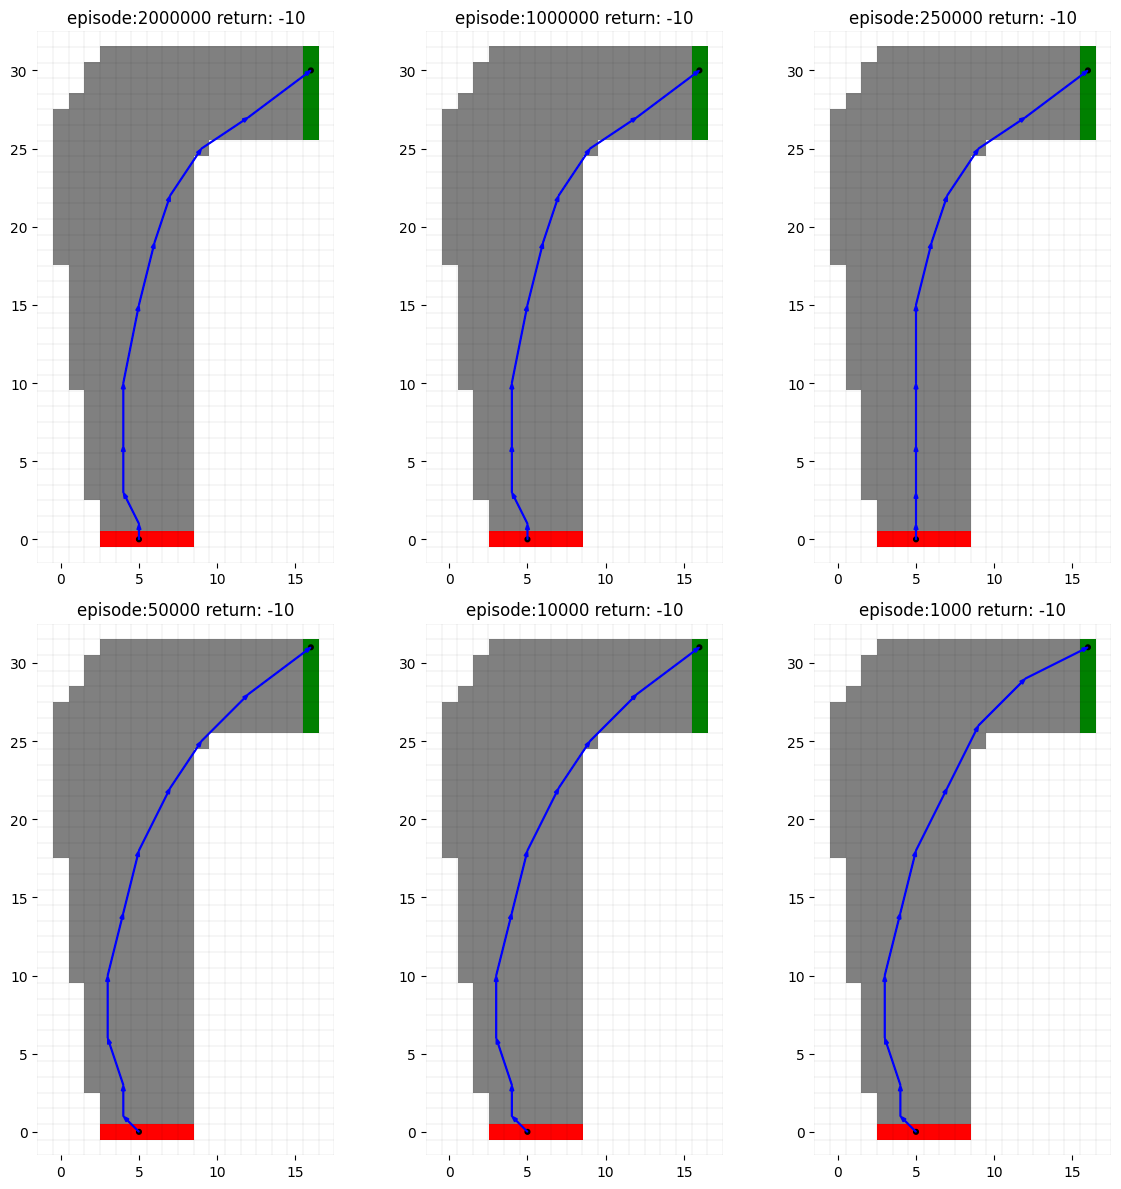

In [417]:
races = get_races('figure05-05-left', sub_race='latest')
show_races(races, (5, 0))

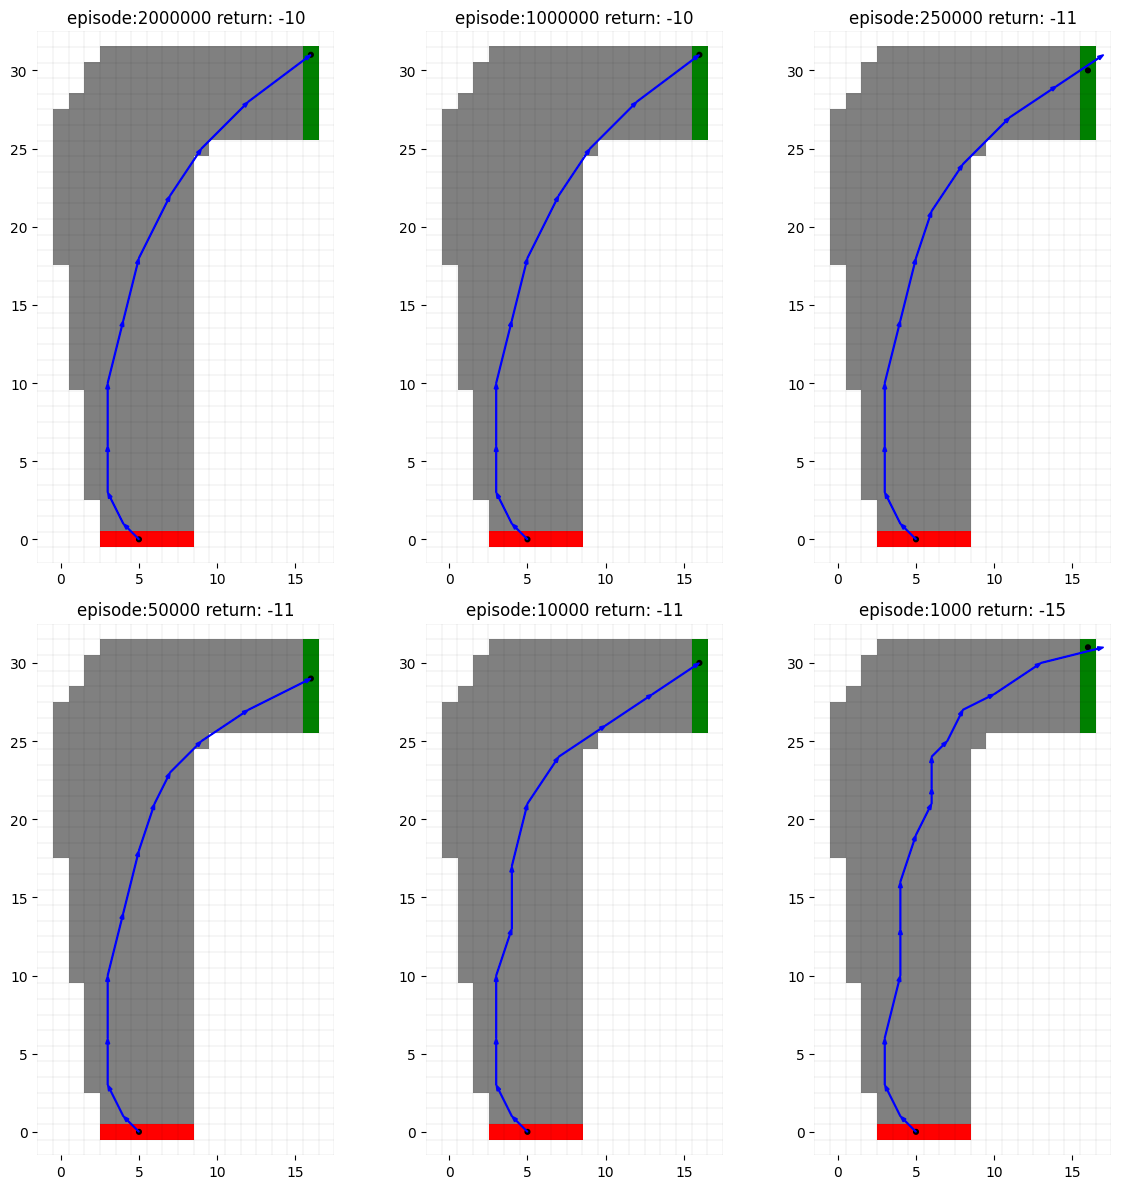

In [415]:
races = get_races('figure05-05-left', sub_race='acceleration_reward') 
show_races(races, (5, 0)) 

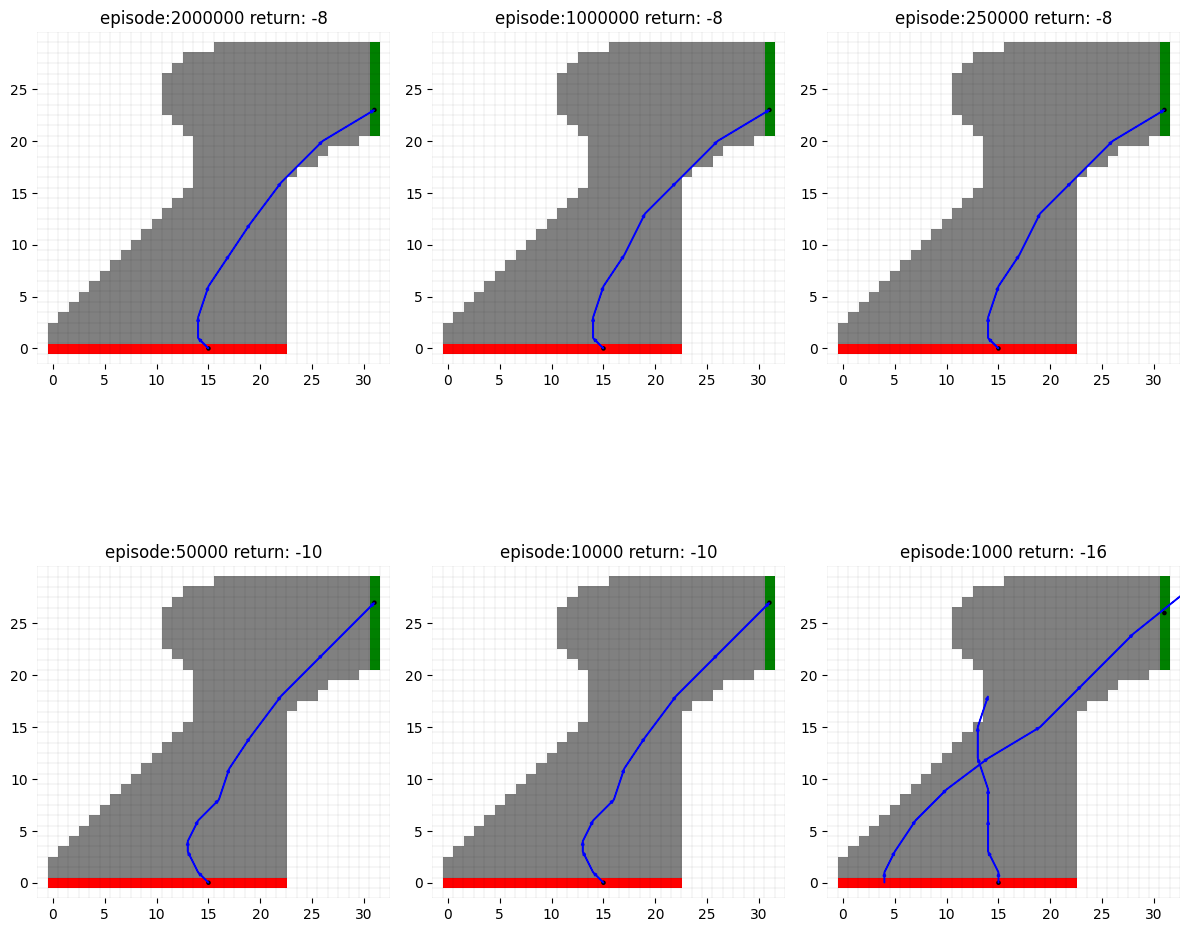

In [425]:
races = get_races('figure05-05-right', sub_race='latest')
show_races(races, (15, 0))

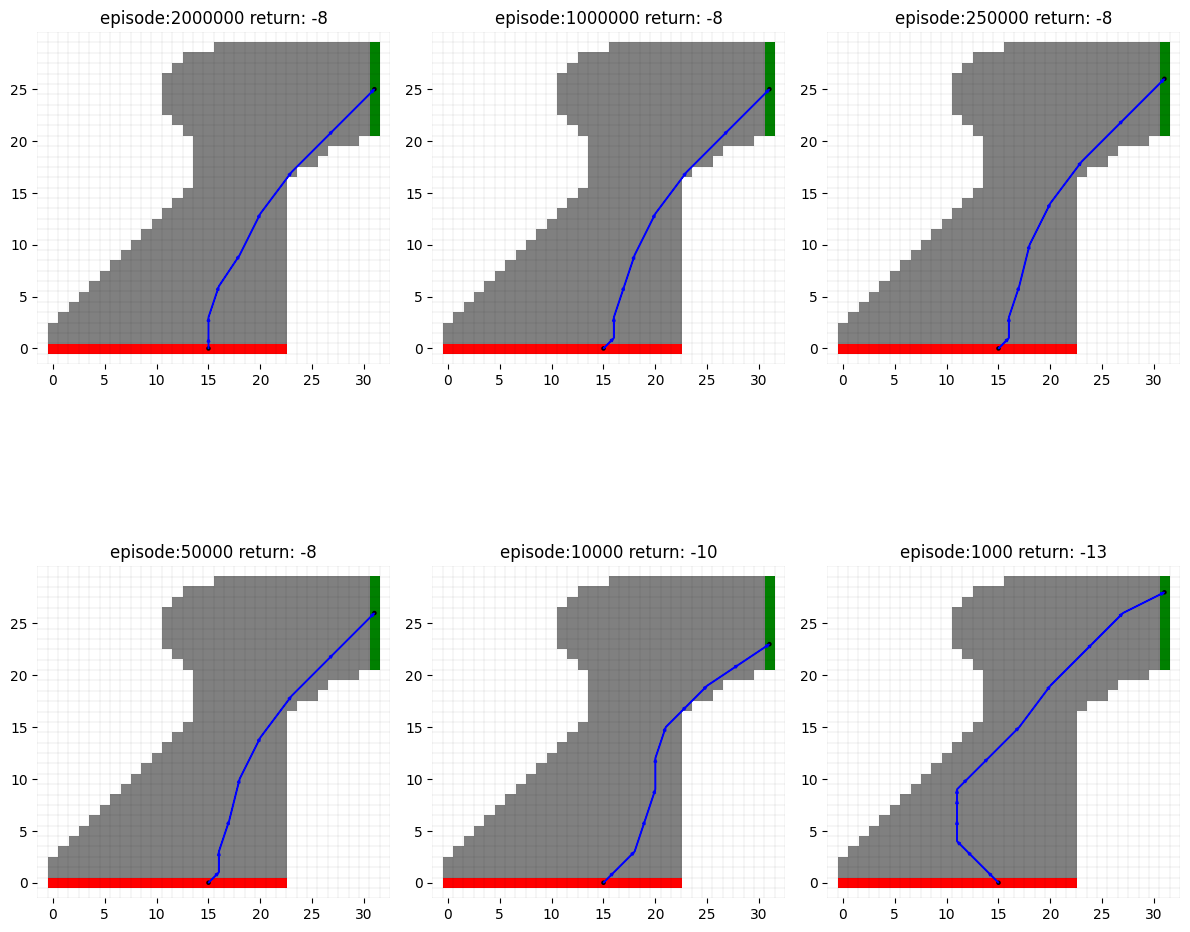

In [426]:
races = get_races('figure05-05-right', sub_race='acceleration_reward') 
show_races(races, (15, 0)) 

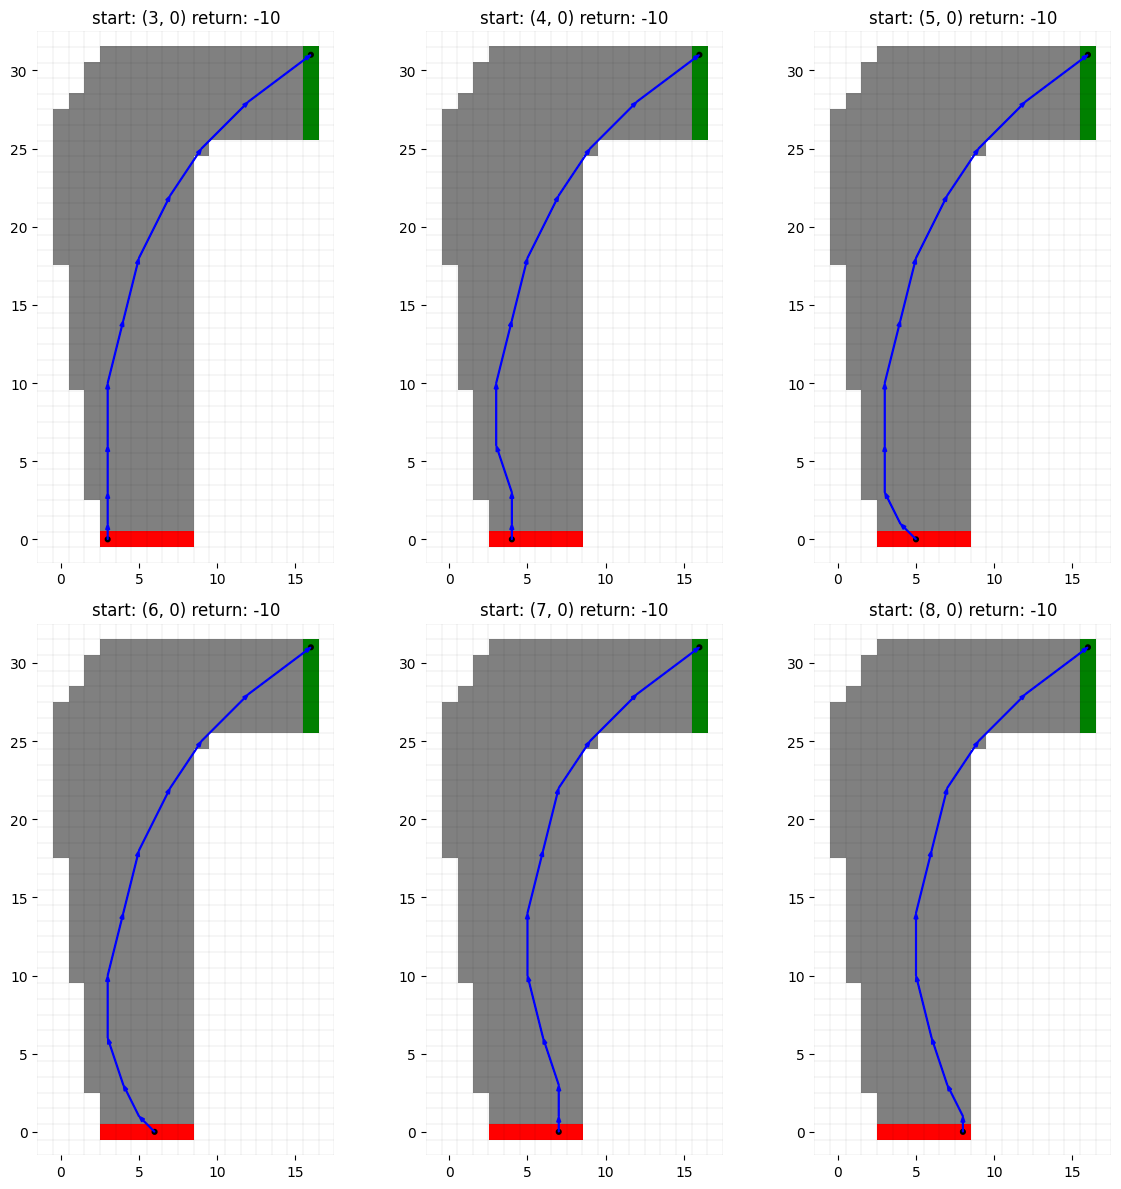

In [418]:
races = get_races('figure05-05-left', sub_race='acceleration_reward')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

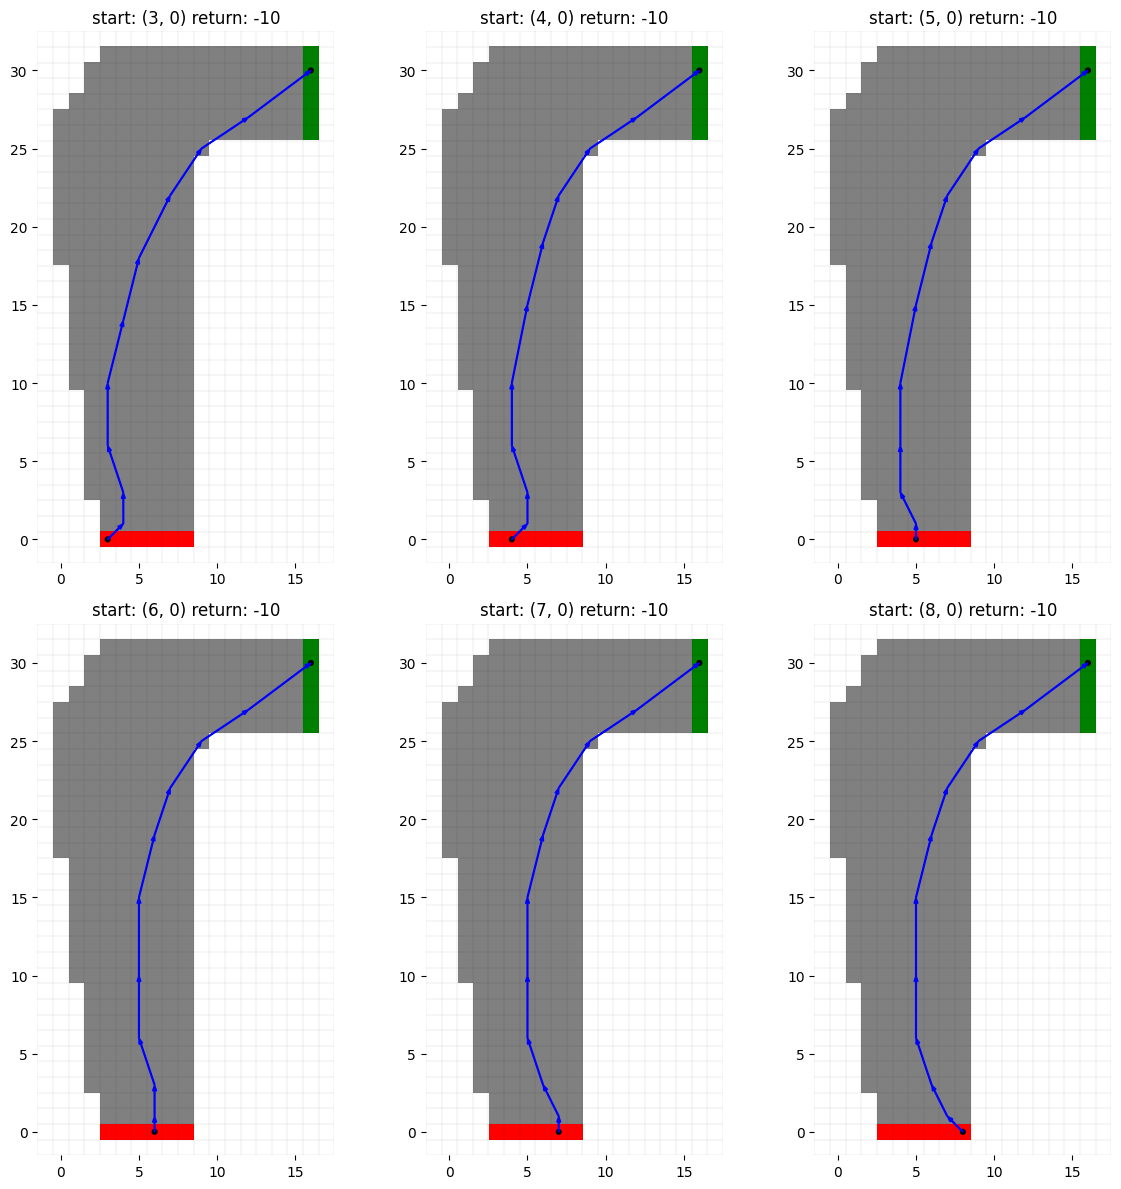

In [419]:
races = get_races('figure05-05-left')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

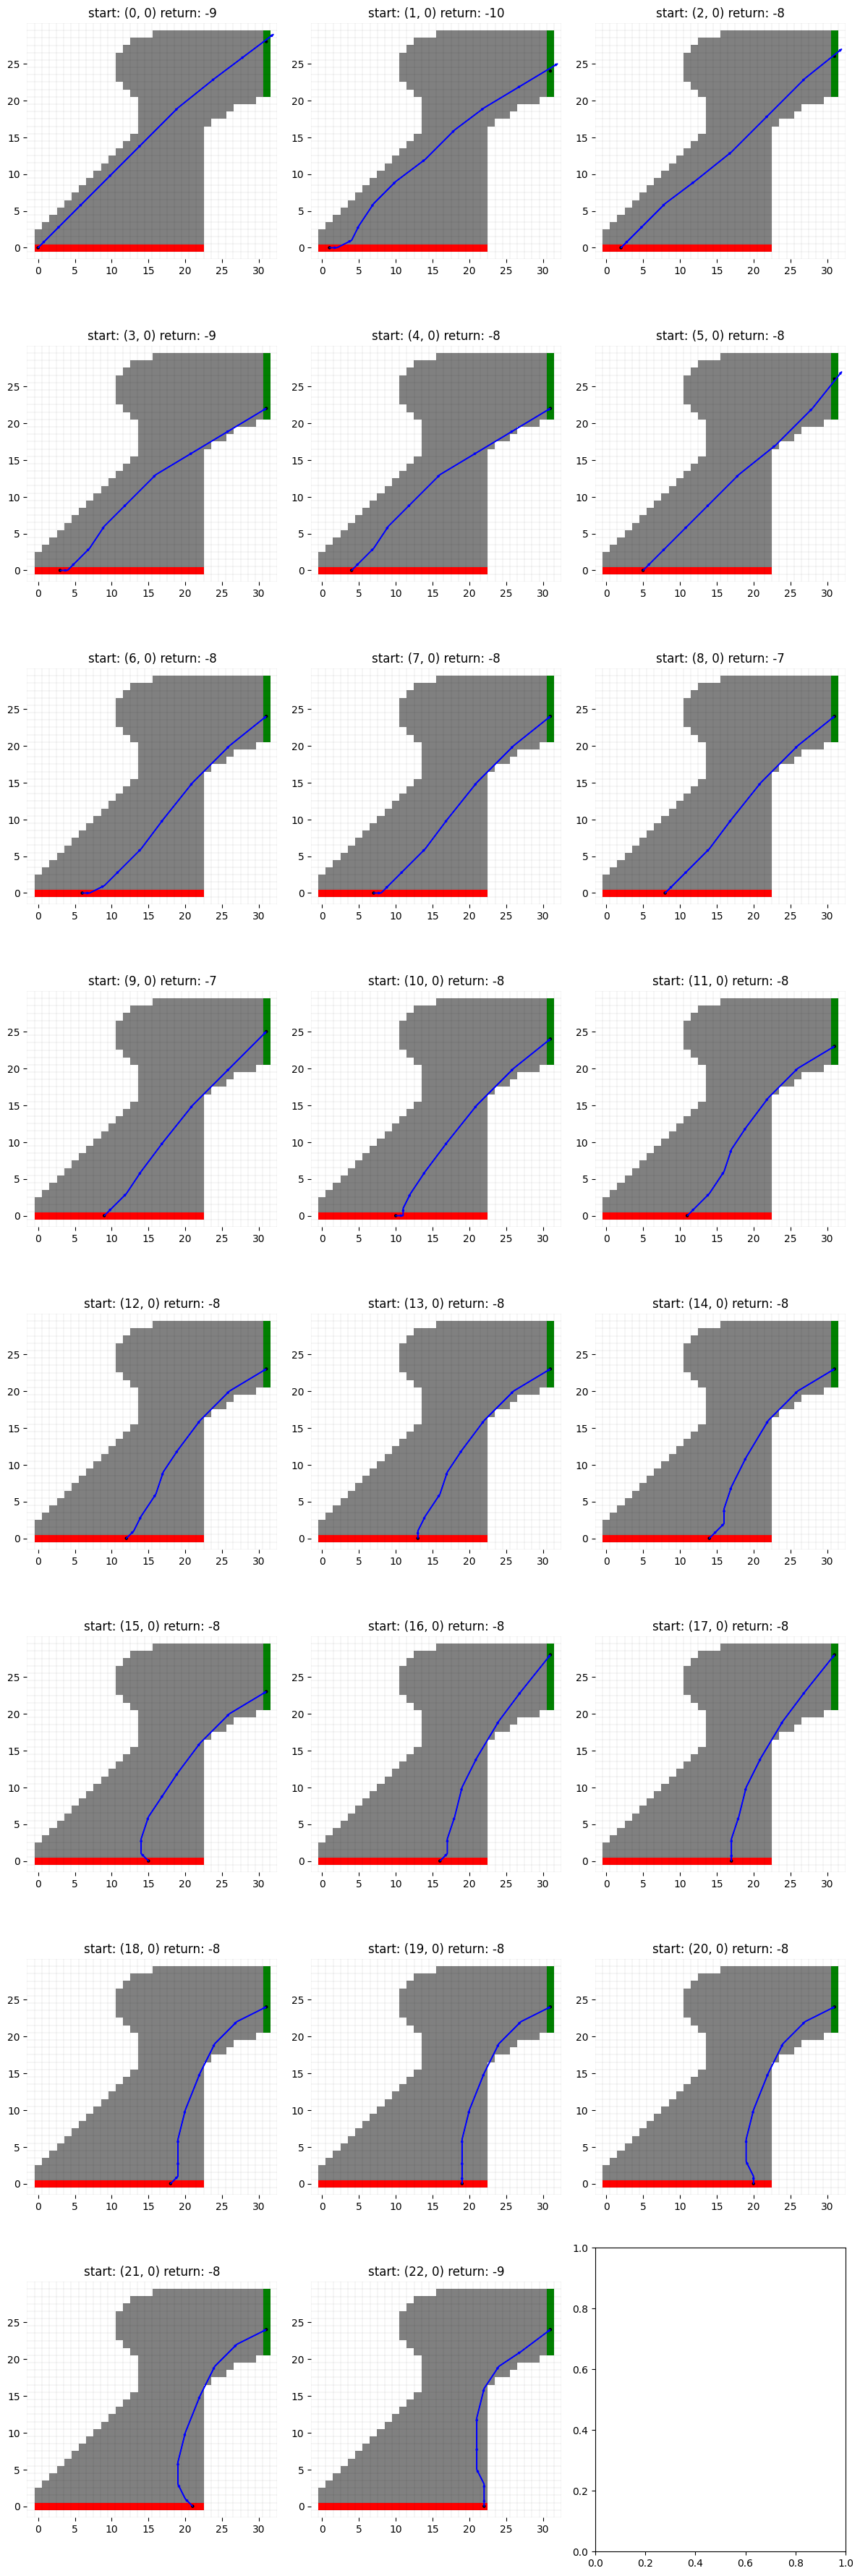

In [429]:
races = get_races('figure05-05-right', sub_race='latest')
race = races[2000000]                     
show_best_trajectory(race, ncols = 3)

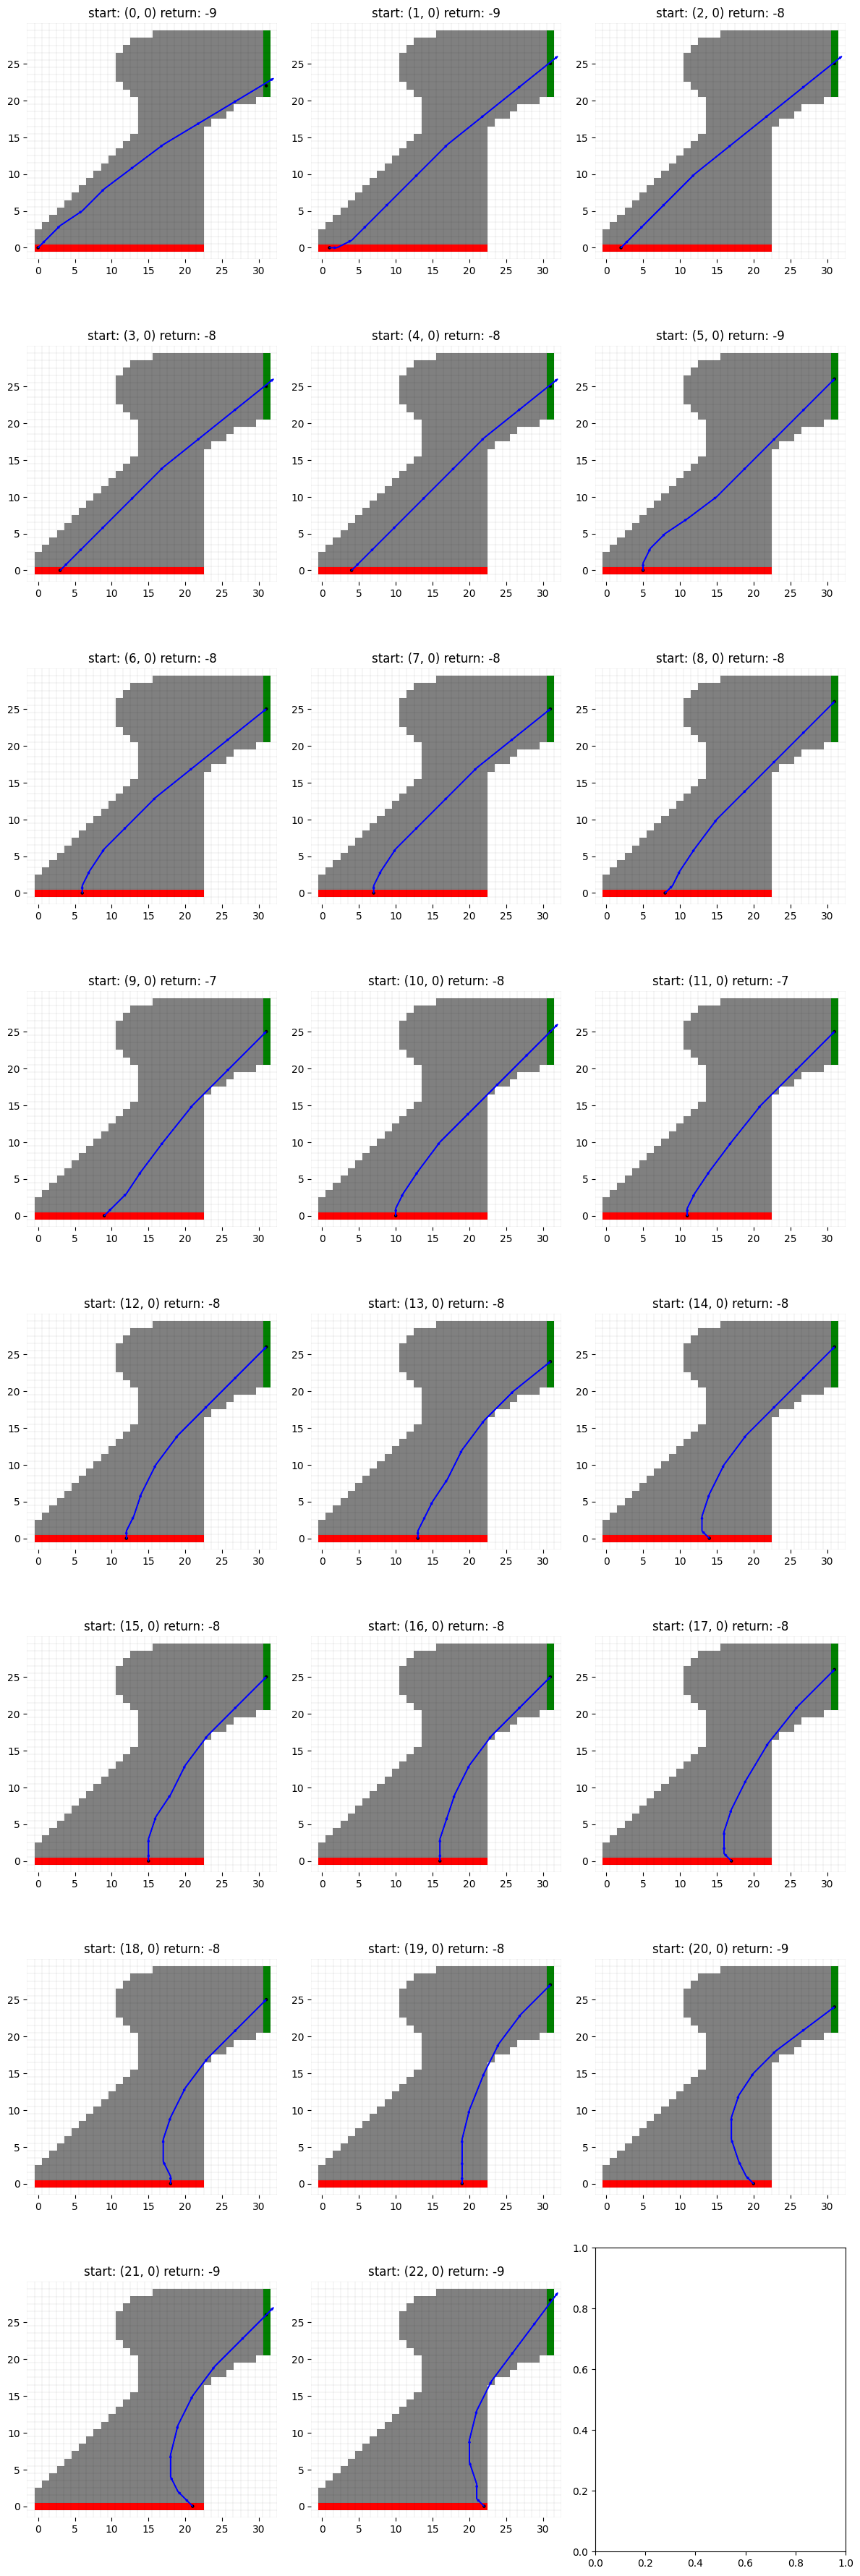

In [430]:
races = get_races('figure05-05-right', sub_race='acceleration_reward')
race = races[2000000]                        
show_best_trajectory(race, ncols = 3)

In [433]:
race.q[((20,0), (0, 0))] 

{(1, 1): -14.220899692364478,
 (-1, 0): -14.644085879855254,
 (0, 1): -12.971705044739904,
 (-1, 1): -12.509099483055174,
 (1, 0): -14.838645631021603,
 (-1, -1): -15.874392335231931,
 (0, -1): -15.981814627254478,
 (1, -1): -16.861839127297458}

In [83]:
import unittest 

suite1 = unittest.TestLoader().loadTestsFromTestCase(c5.test_racetrack.TestRaceTrack)
suite = unittest.TestSuite([suite1])

unittest.TextTestRunner(verbosity=2).run(suite)

test_get_actions (chapter05.test_racetrack.TestRaceTrack) ... ok
test_is_over_boundary (chapter05.test_racetrack.TestRaceTrack) ... ok
test_play (chapter05.test_racetrack.TestRaceTrack) ... ok
test_run (chapter05.test_racetrack.TestRaceTrack) ... 

state=((4, 0), (0, 0)), actions=[(-1, -1), (0, -1), (1, -1), (-1, 0), (1, 0), (-1, 1), (0, 1), (1, 1)]
state=((3, 0), (1, 1)), actions=[(0, -1), (1, -1), (-1, 0), (0, 0), (1, 0), (-1, 1), (0, 1), (1, 1)]
state=((3, 0), (5, 1)), actions=[(-1, -1), (0, -1), (-1, 0), (0, 0), (-1, 1), (0, 1)]
state=((3, 0), (-5, 1)), actions=[(0, -1), (1, -1), (0, 0), (1, 0), (0, 1), (1, 1)]
state=((3, 0), (-1, 5)), actions=[(-1, -1), (0, -1), (1, -1), (-1, 0), (0, 0), (1, 0)]
state=((3, 0), (-1, -5)), actions=[(-1, 0), (0, 0), (1, 0), (-1, 1), (0, 1), (1, 1)]
state=((3, 0), (5, -5)), actions=[(-1, 0), (0, 0), (-1, 1), (0, 1)]


ok

----------------------------------------------------------------------
Ran 4 tests in 0.015s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [80]:
race= c5.racetrack.RaceTrack(racetrack_csv, gamma=1.0)
print(race.actions)
print(race.get_actions(((4, 0), (0, 0))))

[(-1, -1), (0, -1), (1, -1), (-1, 0), (0, 0), (1, 0), (-1, 1), (0, 1), (1, 1)]
[(-1, -1), (0, -1), (1, -1), (-1, 0), (1, 0), (-1, 1), (0, 1), (1, 1)]


In [84]:
set([1,2,3,4])

{1, 2, 3, 4}

In [87]:
track_positions = [(1,2), (3, 4)]
list(zip(*track_positions)) 

[(1, 3), (2, 4)]